In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = datagen.flow_from_directory("dataset/train_set/",target_size=(64,64),class_mode='categorical')

Found 4723 images belonging to 4 classes.


In [5]:
test_generator = datagen.flow_from_directory("dataset/test_set/",target_size=(64,64),class_mode='categorical')

Found 4723 images belonging to 4 classes.


In [6]:
train_generator

In [7]:
data,label = next(train_generator)
data.shape

(32, 64, 64, 3)

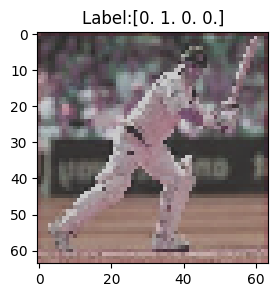

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(data[2])  #from 32 images take first image
plt.title(f"Label:{label[2]}")   # take label of first image& show it as title of image
plt.show()

In [14]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,activation="relu",input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))
# cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))   #output layers
cnn.add(tf.keras.layers.Dense(4, activation='softmax'))

In [15]:
cnn.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,604 (3.10 MB)

 Trainable params: 813,604 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# result = cnn.fit(x = train_generator,epochs=1)
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   
    metrics=['accuracy']
)

In [18]:
result = cnn.fit(x = train_generator,epochs=10)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 66s 434ms/step - accuracy: 0.5062 - loss: 1.1248
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 30s 205ms/step - accuracy: 0.7813 - loss: 0.6097
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 30s 201ms/step - accuracy: 0.8573 - loss: 0.4009
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 30s 205ms/step - accuracy: 0.9113 - loss: 0.2707
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 207ms/step - accuracy: 0.9460 - loss: 0.1660
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.9638 - loss: 0.1141
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 32s 219ms/step - accuracy: 0.9790 - loss: 0.0717
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 195ms/step - accuracy: 0.9886 - loss: 0.0463
Epoch 9/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.9915 - loss: 0.0384
Epoch 10/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.9966 - loss: 0.0212


In [19]:
cnn.evaluate(test_generator)

148/148 ━━━━━━━━━━━━━━━━━━━━ 46s 307ms/step - accuracy: 0.9998 - loss: 0.0073


[0.007305776234716177, 0.9997882843017578]

In [20]:
from tensorflow.keras.utils import load_img, img_to_array

# Load image
new_image = load_img('dataset/single_prediction/6d6b3b9b-ec5f-4c6d-89fc-6d3b9dc801fa.webp',target_size=(64, 64))

# Convert to array
new_image = img_to_array(new_image)

# Rescale if you used rescale=1./255 during training
new_image = new_image / 255.0

# Add batch dimension
new_image = np.expand_dims(new_image, axis=0)

In [21]:
result = cnn.predict(new_image)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[9.4657892e-01 1.5518088e-05 1.4660612e-03 5.1939521e-02]]


In [22]:
predicted_class_index = np.argmax(result)
print("Predicted Index:", predicted_class_index)


Predicted Index: 0


In [23]:
class_indices = train_generator.class_indices
print(class_indices)


{'drive': 0, 'legglance-flick': 1, 'pullshot': 2, 'sweep': 3}


In [24]:
class_labels = dict((v,k) for k,v in class_indices.items())

prediction = class_labels[predicted_class_index]
print("Shot Prediction:", prediction)

Shot Prediction: drive


In [25]:
cnn.save("model.h5")

In [26]:
import json

with open("class_names.json", "w") as f:
    json.dump(train_generator.class_indices, f)

In [27]:
print(cnn.output_shape)

(None, 4)


In [28]:
print(train_generator.class_indices)

{'drive': 0, 'legglance-flick': 1, 'pullshot': 2, 'sweep': 3}
